In [1]:
import pandas as pd # 引用套件並縮寫為 pd  
df_capterra = pd.read_csv('GoogleMeet.csv', encoding='utf_8_sig', index_col=0) 
df_capterra

,Review,Title,Overall,Pros,Cons,Switch,Switch_reason,Alter,Alter_reason
0,1,“Google Meet is finally hitting its stride”,"Meet is great for screen-sharing, quick to lau...",After a window of time when Zoom dominated all...,Meet is suffering from a monstrously bad decis...,Zoom Meetings,Meet is included with our GSuite license and i...,"Zoom Meetings, Anywhere365 and Slack",Didn't seriously consider Skype because of Mic...
1,2,“Google meet with Aman Exchange for Video and ...,For the new circumstances working from home is...,"The sound and video streamed clearly, easy to...",Recording features need to be added and implem...,Zoho Meeting,The another product expensive and providing th...,Zoom Meetings,Ease of access and messaging capability and go...
2,3,"“Not a bad product, no installation required, ...",I noticed Google Meet had issues on some compu...,I like that Google Meet is free and that nothi...,The video quality freezes up more frequently t...,NaN,NaN,"Webex, Zoom Meetings and BlueJeans",Google Meet was the most cost effective option.
3,4,“I prefer this to other virtual meeting platfo...,"It's been great, I prefer it to all others.","It is super easy to use, especially when paire...","Sometimes the connection can be a bit fuzzy, a...",Zoom Meetings,"Easier to use, integrated with google suite, w...",NaN,NaN
4,5,“Meet the best Online Meet software ”,"10/10, The best online meeting software",What I like the most is that it is completely ...,Nothing! I'm happy with every little feature o...,NaN,NaN,Zoom Meetings,Price and video call time
...,...,...,...,...,...,...,...,...,...
2995,2996,“Simple native app”,Great for internal communication between two c...,The main advantage over other messengers is in...,Slow work in the web version. Mobile phone app...,NaN,NaN,NaN,NaN
2996,2997,“Love Google Hangouts”,"Overall, my experience has been great and it h...",Simple to get setup if you have a Google accou...,I honestly don't know if I have come across an...,NaN,NaN,NaN,NaN
2997,2998,“Google Hangouts for Painless Communication”,NaN,I love to chat on google hangouts as it is ver...,There's really nothing I dislike about Google ...,NaN,NaN,NaN,NaN
2998,2999,“Love it”,NaN,This makes communication so easy among my non ...,Wish it was easier to send gifs etc and the em...,NaN,NaN,NaN,NaN


In [2]:
doc_complete = df_capterra.Pros.values.tolist()
doc_complete[0]

"After a window of time when Zoom dominated all of our online interactions to the point that it became a verb, Google Meet is finally coming back. While implementing a lot of good ideas from Zoom (blurred backgrounds, virtual backgrounds, easier sharing tools), Google Meet is finally living up the challenge of Zoom, which innovated very quickly during the pandemic. For a long while, we used Zoom because it was ubiquitous and most customers wanted a Zoom. We're veering back to Meet for sessions, still favoring them over Slack, which we use for internal comms."

In [3]:
# Convert to list
doc_complete = df_capterra.Pros.values.tolist()
doc_seperate=[]
import re
for review in doc_complete:
    pattern = r'.'
    review = str(review)
    result = review.split('.')
    for i in result:
        doc_seperate.append(i)
doc_seperate[1]

' While implementing a lot of good ideas from Zoom (blurred backgrounds, virtual backgrounds, easier sharing tools), Google Meet is finally living up the challenge of Zoom, which innovated very quickly during the pandemic'

In [4]:
import gensim
from gensim.utils import simple_preprocess
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

data_words = list(sent_to_words(doc_seperate))
print(data_words[1])

['while', 'implementing', 'lot', 'of', 'good', 'ideas', 'from', 'zoom', 'blurred', 'backgrounds', 'virtual', 'backgrounds', 'easier', 'sharing', 'tools', 'google', 'meet', 'is', 'finally', 'living', 'up', 'the', 'challenge', 'of', 'zoom', 'which', 'innovated', 'very', 'quickly', 'during', 'the', 'pandemic']


In [5]:
from gensim.models.phrases import Phrases, ENGLISH_CONNECTOR_WORDS
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# See trigram example
print(trigram_mod[bigram_mod[data_words[0]]])

['after', 'window', 'of', 'time', 'when', 'zoom', 'dominated', 'all', 'of', 'our', 'online', 'interactions', 'to', 'the', 'point', 'that', 'it', 'became', 'verb', 'google', 'meet', 'is', 'finally', 'coming', 'back']


In [6]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['nan', 'subject', 're', 'edu'])

# Define functions for stopwords, bigrams, trigrams and lemmatization
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [7]:
import spacy
# Remove Stop Words
data_words_nostops = remove_stopwords(data_words)

# Form Bigrams
data_words_trigrams = make_trigrams(data_words_nostops)

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# !python -m spacy download en

nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_trigrams, allowed_postags=['NOUN'])

print(data_lemmatized[8])

['part', 'platform']


In [8]:
from gensim import corpora
# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)

# Create Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1])

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1)]]


### LDA 法一

In [9]:
from gensim.models import CoherenceModel
# Build LDA model
import matplotlib.pyplot as plt
topics_num = []
Coherence_Score = []

for i in range(1,21):
    lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                               id2word=id2word,
                                               num_topics=i, 
                                               random_state=100,
                                               update_every=1,
                                               chunksize=100,
                                               passes=10,
                                               alpha='auto',
                                               per_word_topics=True)
    coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
    coherence_lda = coherence_model_lda.get_coherence()
    topics_num.append(i)
    Coherence_Score.append(coherence_lda)

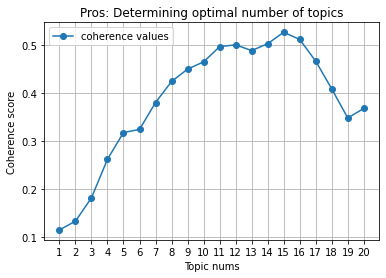

In [10]:
lines = plt.plot(topics_num, Coherence_Score)
plt.setp(lines, marker = "o") 
plt.grid(True)
plt.title("Pros: Determining optimal number of topics") 
plt.xlabel("Topic nums")
plt.ylabel("Coherence score")
plt.legend(["coherence values"], loc='best')
plt.xticks(topics_num)
plt.show()

In [9]:
# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=15, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [10]:
from pprint import pprint
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.243*"email" + 0.220*"way" + 0.159*"screen" + 0.113*"share" + '
  '0.061*"presentation" + 0.039*"co_worker" + 0.032*"face" + 0.027*"address" + '
  '0.012*"pop" + 0.007*"attendee"'),
 (1,
  '0.209*"gmail" + 0.158*"communication" + 0.131*"account" + 0.067*"business" '
  '+ 0.066*"product" + 0.064*"thing" + 0.062*"computer" + 0.041*"suite" + '
  '0.039*"coworker" + 0.031*"join"'),
 (2,
  '0.172*"application" + 0.125*"interface" + 0.120*"person" + 0.094*"service" '
  '+ 0.083*"functionality" + 0.063*"mobile" + 0.058*"system" + 0.047*"datum" + '
  '0.034*"document" + 0.029*"collaboration"'),
 (3,
  '0.361*"call" + 0.149*"work" + 0.134*"team" + 0.127*"device" + '
  '0.053*"browser" + 0.045*"client" + 0.043*"touch" + 0.011*"reason" + '
  '0.009*"fun" + 0.006*"price"'),
 (4,
  '0.459*"hangout" + 0.108*"integration" + 0.107*"company" + 0.043*"year" + '
  '0.042*"advantage" + 0.039*"event" + 0.038*"staff" + 0.034*"world" + '
  '0.023*"calling" + 0.006*"extension"'),
 (5,
  '0.217*"phone

In [11]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

from gensim.models import CoherenceModel
# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -8.42398175201787

Coherence Score:  0.5276442687423216


In [14]:
import pyLDAvis
import pyLDAvis.gensim_models
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
7      0.284923  0.318056       1        1  10.754291
8      0.246141 -0.338979       2        1  10.346998
1      0.050367 -0.006698       3        1   9.231006
13     0.092436 -0.016003       4        1   9.139227
5      0.039382 -0.005096       5        1   9.098448
3      0.049343 -0.006243       6        1   8.641517
12    -0.063380  0.004967       7        1   6.165156
14    -0.078632  0.005880       8        1   5.715765
0     -0.046143  0.003798       9        1   5.642242
4     -0.075384  0.005697      10        1   5.540359
10    -0.081573  0.006045      11        1   5.491367
11    -0.104998  0.007175      12        1   3.666466
2     -0.098736  0.006906      13        1   3.625495
6     -0.106275  0.007223      14        1   3.512208
9     -0.107471  0.007271      15        1   3.429454, topic_info=            Term         Freq        Total Category  logprob  loglift
28           use  1573.000000  1573.000000  Default  30.0000  30.0000
22         video  1531.000000  1531.000000  Default  29.0000  29.0000
99          call  1061.000000  1061.000000  Default  28.0000  28.0000
102      hangout   865.000000   865.000000  Default  27.0000  27.0000
17       meeting   861.000000   861.000000  Default  26.0000  26.0000
...          ...          ...          ...      ...      ...      ...
847   scheduling     0.085362     1.293310  Topic15  -9.5211   0.6547
107        thank     0.085617     1.302290  Topic15  -9.5181   0.6508
331        order     0.085192     1.294537  Topic15  -9.5231   0.6518
1032     opinion     0.085001     1.289096  Topic15  -9.5253   0.6537
805       iphone     0.085037     1.322065  Topic15  -9.5249   0.6289

[577 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
170       4  0.992490   ability
173       5  0.991636    access
191       3  0.997063   account
67        4  0.912951  addition
200       9  0.971007   address
...     ...       ...       ...
3        12  0.990454    window
313       6  0.997224      work
110      10  0.979935     world
185      10  0.991140      year
4        11  0.962290      zoom

[209 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[8, 9, 2, 14, 6, 4, 13, 15, 1, 5, 11, 12, 3, 7, 10])

In [11]:
def format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=texts):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row[0], key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each review
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=doc_seperate)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Pros_review_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']

# Show
df_dominant_topic

,Pros_review_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,11.0,0.2470,"time, calendar, window, io, mail, student, chr...",After a window of time when Zoom dominated all...
1,1,12.0,0.3757,"software, tool, lot, program, sharing, file, p...",While implementing a lot of good ideas from Z...
2,2,10.0,0.2811,"feature, user, day, integrate, home, question,...","For a long while, we used Zoom because it was..."
3,3,5.0,0.3072,"phone, app, contact, link, number, access, mee...","We're veering back to Meet for sessions, stil..."
4,4,8.0,0.1084,"use, friend, family, ease, office, google, emp...",
...,...,...,...,...,...
11536,11536,8.0,0.1084,"use, friend, family, ease, office, google, emp...",It's that simple
11537,11537,8.0,0.1084,"use, friend, family, ease, office, google, emp...",No Frills
11538,11538,7.0,0.2068,"video, message, quality, conference, member, p...","You can message, phone call, or make video calls"
11539,11539,8.0,0.1084,"use, friend, family, ease, office, google, emp...",And it comes as standard Google


In [16]:
df_dominant_topic[df_dominant_topic["Dominant_Topic"] == 14.0].sort_values(by=['Topic_Perc_Contrib'], ascending=False)

,Pros_review_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
81,81,14.0,0.3350,"meeting, platform, colleague, place, invite, r...",I love that Google Meets is a secure platform...
4728,4728,14.0,0.2833,"meeting, platform, colleague, place, invite, r...",It has easy access \nThe rejoin is easy as it ...
1162,1162,14.0,0.2820,"meeting, platform, colleague, place, invite, r...",You can set up an online meeting for up to 1...
5547,5547,14.0,0.2820,"meeting, platform, colleague, place, invite, r...","Easy to join, easy to invite, easy to create m..."
5587,5587,14.0,0.2820,"meeting, platform, colleague, place, invite, r...",The host of the meeting has the right to remo...
...,...,...,...,...,...
6942,6942,14.0,0.1136,"meeting, platform, colleague, place, invite, r...","Easy feature that allows ""control"" of a meetin..."
7612,7612,14.0,0.1136,"meeting, platform, colleague, place, invite, r...","Unlike Zoom, I like that Google Meet has unlim..."
1833,1833,14.0,0.1136,"meeting, platform, colleague, place, invite, r...",I love that it integrates right in with the c...
8292,8292,14.0,0.1058,"meeting, platform, colleague, place, invite, r...",I like how Google Hangouts Meet integrates wit...


In [13]:
# Group top 5 sentences under each topic
sent_topics_sorteddf_mallet = pd.DataFrame()

sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet, 
                                             grp.sort_values(['Perc_Contribution'], ascending=[0]).head(1)], 
                                            axis=0)

# Reset Index    
sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorteddf_mallet.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Text"]

# Show
sent_topics_sorteddf_mallet

,Topic_Num,Topic_Perc_Contrib,Keywords,Text
0,0.0,0.3943,"email, way, screen, share, presentation, co_wo...",Its easy to start with a full screen and then...
1,1.0,0.3356,"gmail, communication, account, business, produ...",Here's what I like the most: \n- It's a stan...
2,2.0,0.2371,"application, interface, person, service, funct...","jam board, chatbox, Google docs, Google class..."
3,3.0,0.3105,"call, work, team, device, browser, client, tou...",The video call allows more than just a one on...
4,4.0,0.2818,"hangout, integration, company, year, advantage...",Google Hangouts has become our company's go-to...
5,5.0,0.3766,"phone, app, contact, link, number, access, mee...",I can switch from my regular phone number an...
6,6.0,0.2658,"people, connection, talk, country, school, cla...",I've created a class that has people across th...
7,7.0,0.3697,"video, message, quality, conference, member, p...",\n-Lets you see who in the contact list is cur...
8,8.0,0.3439,"use, friend, family, ease, office, google, emp...",Who thought that making the video calls will b...
9,9.0,0.2709,"love, option, fact, other, issue, sticker, emo...",I love the fact that the Meet can create capt...


In [14]:
# Number of Documents for Each Topic
topic_counts = df_topic_sents_keywords['Dominant_Topic'].value_counts()

# Percentage of Documents for Each Topic
topic_contribution = round(topic_counts/topic_counts.sum(), 4)
# topic_contribution = topic_contribution.rename_axis('Dominant_Topic').reset_index(name='percentage')

# Topic Number and Keywords
topic_num_keywords = df_topic_sents_keywords[['Dominant_Topic', 'Topic_Keywords']].drop_duplicates()
topic_num_keywords.index = range(len(topic_num_keywords))

# Concatenate Column wise
df_dominant_topics = pd.concat([topic_num_keywords, topic_contribution, topic_counts], axis=1)
df_dominant_topics.columns = ['Dominant_Topic', 'Topic_Keywords', 'Perc_eviews', 'Num_Reviews']
df_dominant_topics.sort_values(by=['Dominant_Topic'])

,Dominant_Topic,Topic_Keywords,Perc_eviews,Num_Reviews
8.0,0.0,"email, way, screen, share, presentation, co_wo...",0.4262,4919
10.0,1.0,"gmail, communication, account, business, produ...",0.0249,287
9.0,2.0,"application, interface, person, service, funct...",0.0100,115
11.0,3.0,"call, work, team, device, browser, client, tou...",0.0114,131
12.0,4.0,"hangout, integration, company, year, advantage...",0.0339,391
3.0,5.0,"phone, app, contact, link, number, access, mee...",0.0412,476
7.0,6.0,"people, connection, talk, country, school, cla...",0.1196,1380
5.0,7.0,"video, message, quality, conference, member, p...",0.0759,876
4.0,8.0,"use, friend, family, ease, office, google, emp...",0.0240,277
14.0,9.0,"love, option, fact, other, issue, sticker, emo...",0.0279,322


In [ ]:
# 1. Wordcloud of Top N words in each topic
import numpy as np
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

color_list = [('tab:blue', '#1f77b4'), ('tab:orange', '#ff7f0e'), ('tab:green', '#2ca02c'), ('tab:red', '#d62728'), ('tab:purple', '#9467bd'), 
 ('tab:brown', '#8c564b'), ('tab:pink', '#e377c2'),  ('tab:gray', '#7f7f7f'), ('tab:olive', '#bcbd22'), ('tab:cyan', '#17becf'), 
 ('tab:blue', '#1f77b4'), ('tab:orange', '#ff7f0e'), ('tab:green', '#2ca02c'), ('tab:red', '#d62728'), ('tab:purple', '#9467bd'), 
 ('tab:brown', '#8c564b'), ('tab:pink', '#e377c2'),  ('tab:gray', '#7f7f7f'), ('tab:olive', '#bcbd22'), ('tab:cyan', '#17becf')]
# cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'
cols = [color for name, color in color_list]  # more colors: 'mcolors.XKCD_COLORS'
cloud = WordCloud(stopwords=stop_words,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_model.show_topics(formatted=False, num_topics=15)
fig, axes = plt.subplots(5, 3, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i+1), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.savefig('Wordcloud_google_pros.png')

plt.show()

<ipython-input-17-62462aa7d15e>:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
<ipython-input-17-62462aa7d15e>:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
<ipython-input-17-62462aa7d15e>:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
<ipython-input-17-62462aa7d15e>:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
<ipython-input-17-62462aa7d15e>:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation

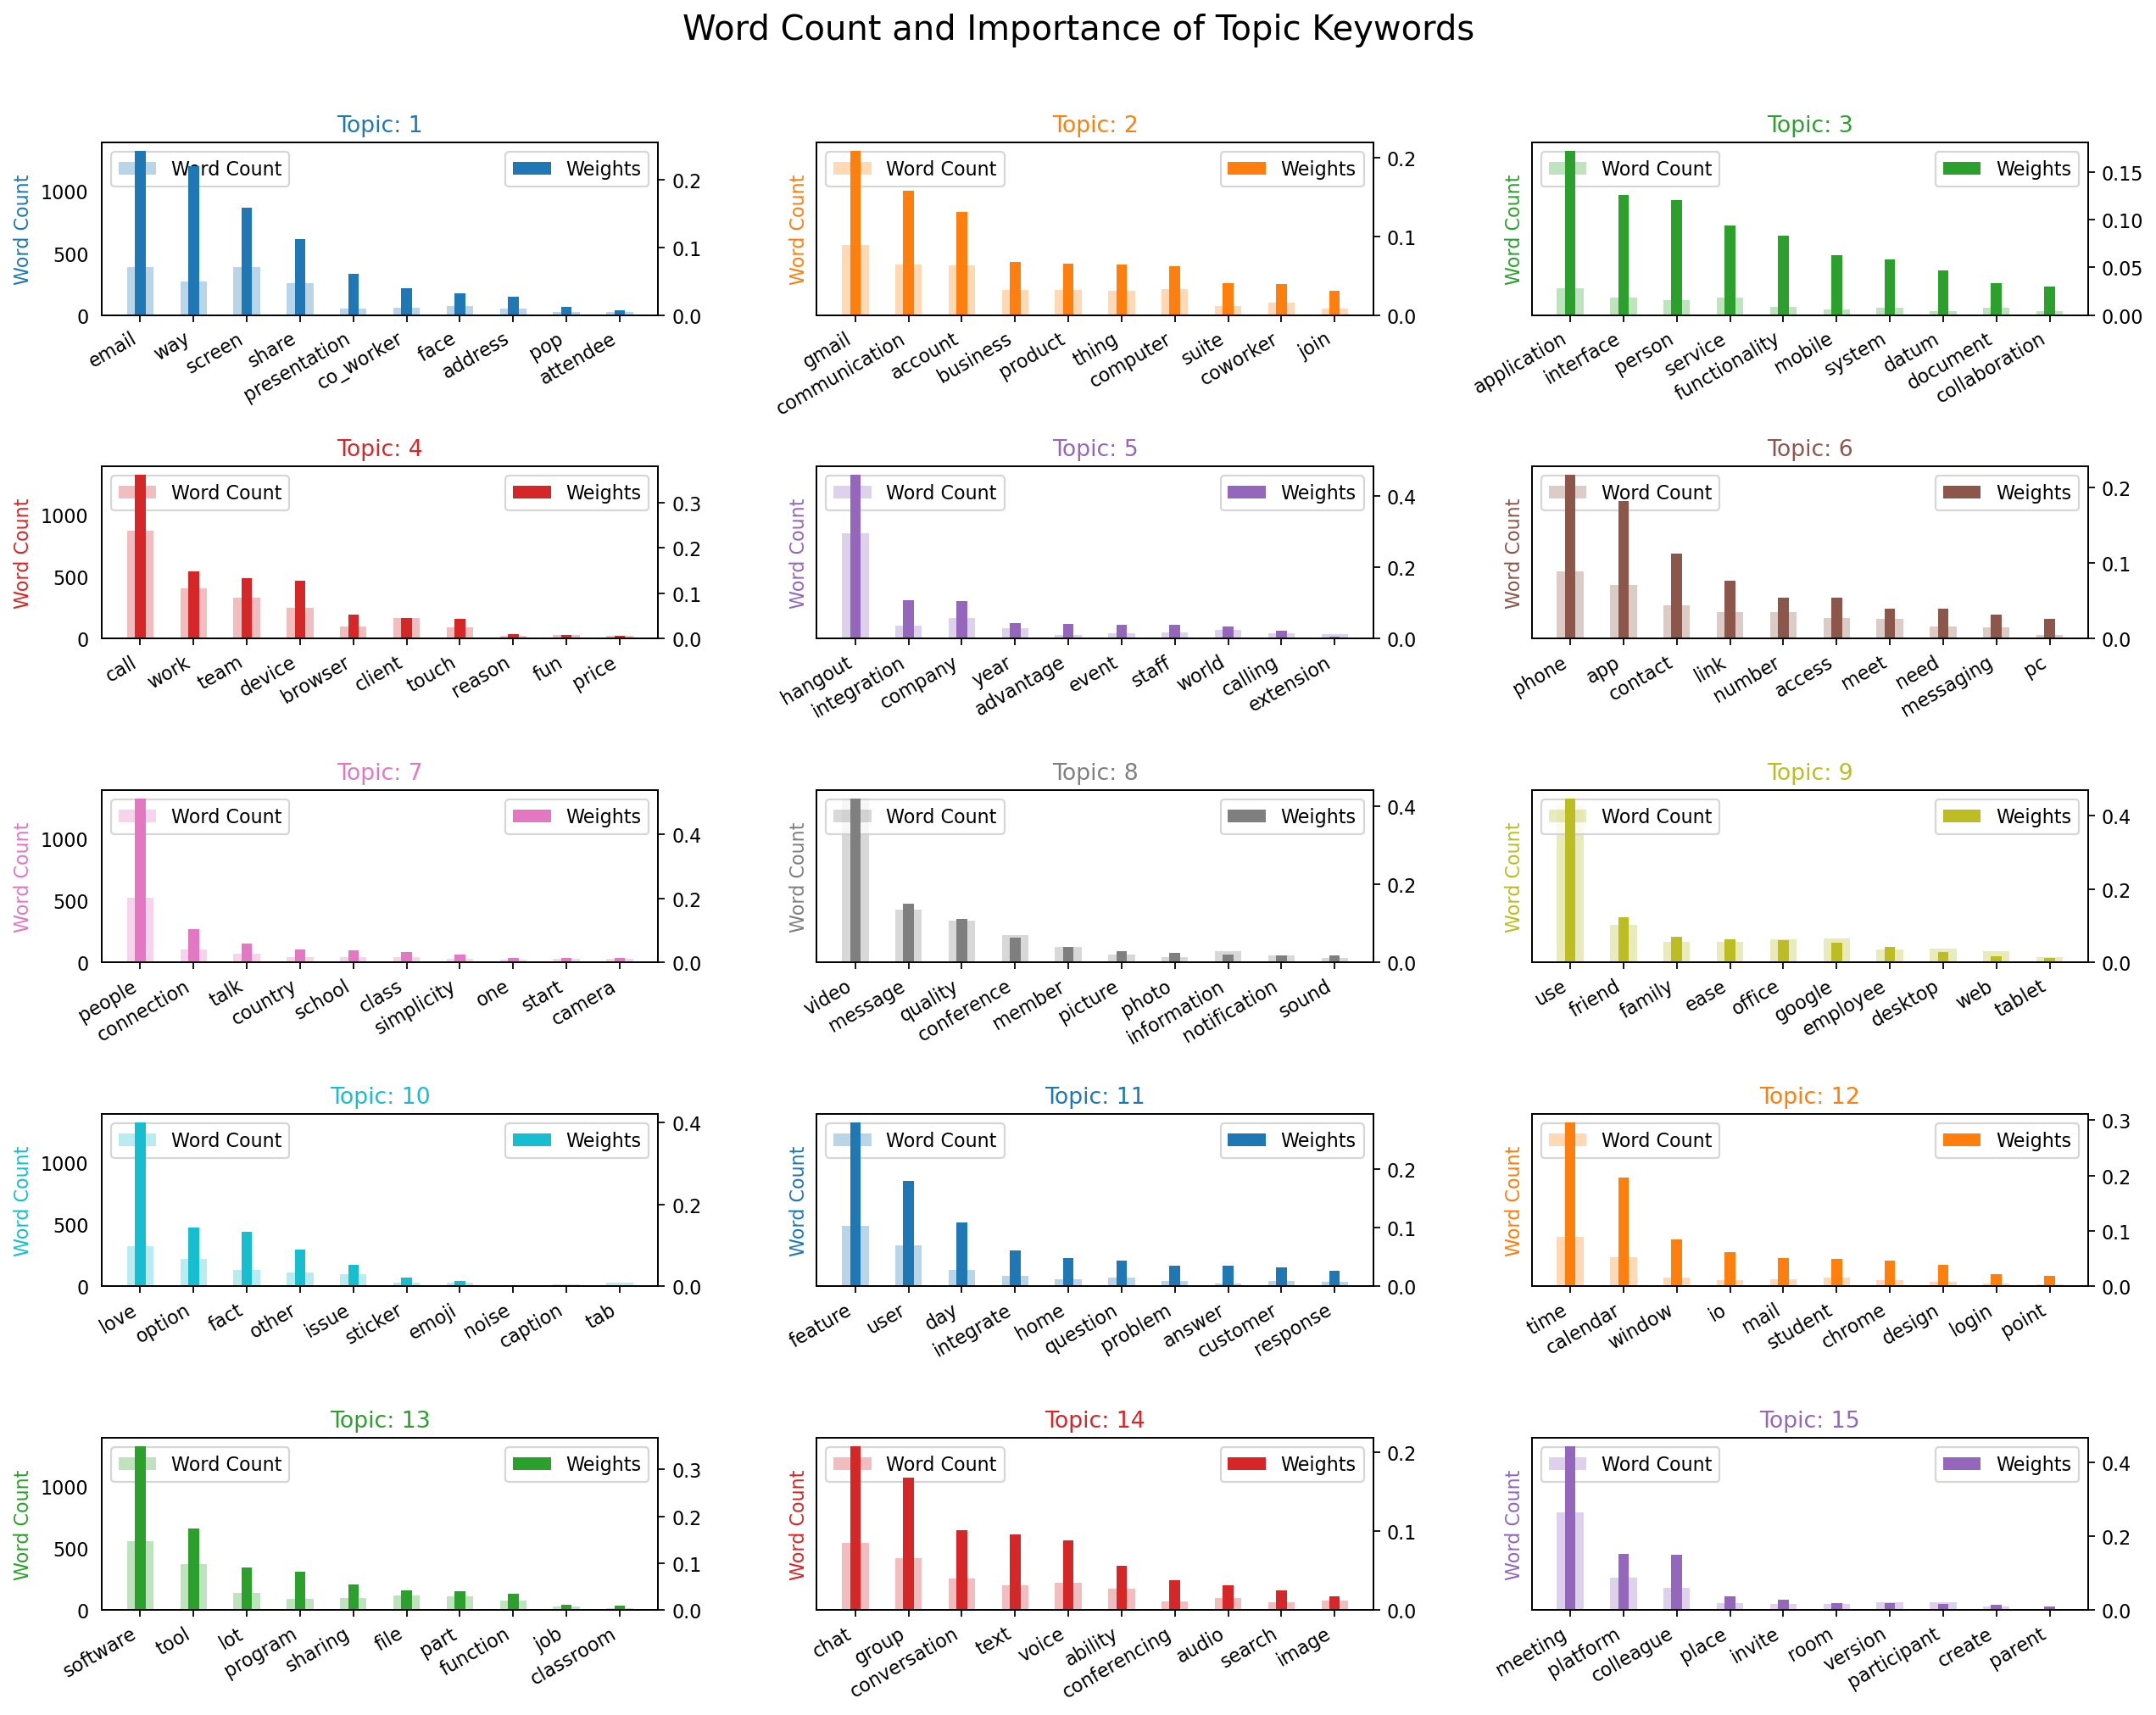

In [17]:
from collections import Counter
topics = lda_model.show_topics(formatted=False, num_topics=15)
data_flat = [w for w_list in data_lemmatized for w in w_list]
counter = Counter(data_flat)

out = []
for i, topic in topics:
    for word, weight in topic:
        out.append([word, i , weight, counter[word]])

df = pd.DataFrame(out, columns=['word', 'topic_id', 'importance', 'word_count'])        

df
# Plot Word Count and Weights of Topic Keywords
fig, axes = plt.subplots(5, 3, figsize=(16,12), sharey=True, dpi=160)
cols = [color for name, color in color_list]
for i, ax in enumerate(axes.flatten()):
    ax.bar(x='word', height="word_count", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.5, alpha=0.3, label='Word Count')
    ax_twin = ax.twinx()
    ax_twin.bar(x='word', height="importance", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.2, label='Weights')
    ax.set_ylabel('Word Count', color=cols[i])
#     ax_twin.set_ylim(0, 0.030); ax.set_ylim(0, 3500)
    ax.set_title('Topic: ' + str(i+1), color=cols[i], fontsize=12)
    ax.tick_params(axis='y', left=False)
    ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
    ax.legend(loc='upper left'); ax_twin.legend(loc='upper right')

fig.tight_layout(w_pad=2)    
fig.suptitle('Word Count and Importance of Topic Keywords', fontsize=18, y=1.05) 

plt.savefig('TopicKeywords_google_pros.png')
plt.show()

In [15]:
# Sentence Coloring of N Sentences
def topics_per_document(model, corpus, start=0, end=1):
    corpus_sel = corpus[start:end]
    dominant_topics = []
    topic_percentages = []
    for i, corp in enumerate(corpus_sel):
        topic_percs, wordid_topics, wordid_phivalues = model[corp]
        dominant_topic = sorted(topic_percs, key = lambda x: x[1], reverse=True)[0][0]
        dominant_topics.append((i, dominant_topic))
        topic_percentages.append(topic_percs)
    return(dominant_topics, topic_percentages)

dominant_topics, topic_percentages = topics_per_document(model=lda_model, corpus=corpus, end=-1)            
# Distribution of Dominant Topics in Each Document
df = pd.DataFrame(dominant_topics, columns=['Document_Id', 'Dominant_Topic'])
dominant_topic_in_each_doc = df.groupby('Dominant_Topic').size()
df_dominant_topic_in_each_doc = dominant_topic_in_each_doc.to_frame(name='count').reset_index()

# Total Topic Distribution by actual weight
topic_weightage_by_doc = pd.DataFrame([dict(t) for t in topic_percentages])
df_topic_weightage_by_doc = topic_weightage_by_doc.sum().to_frame(name='count').reset_index()

# Top 3 Keywords for each Topic
topic_top3words = [(i, topic) for i, topics in lda_model.show_topics(formatted=False, num_topics=15) 
                                 for j, (topic, wt) in enumerate(topics) if j < 3]

df_top3words_stacked = pd.DataFrame(topic_top3words, columns=['topic_id', 'words'])
df_top3words = df_top3words_stacked.groupby('topic_id').agg(', \n'.join)
df_top3words.reset_index(level=0,inplace=True)
df_top3words

,topic_id,words
0,0,"email, \nway, \nscreen"
1,1,"gmail, \ncommunication, \naccount"
2,2,"application, \ninterface, \nperson"
3,3,"call, \nwork, \nteam"
4,4,"hangout, \nintegration, \ncompany"
5,5,"phone, \napp, \ncontact"
6,6,"people, \nconnection, \ntalk"
7,7,"video, \nmessage, \nquality"
8,8,"use, \nfriend, \nfamily"
9,9,"love, \noption, \nfact"


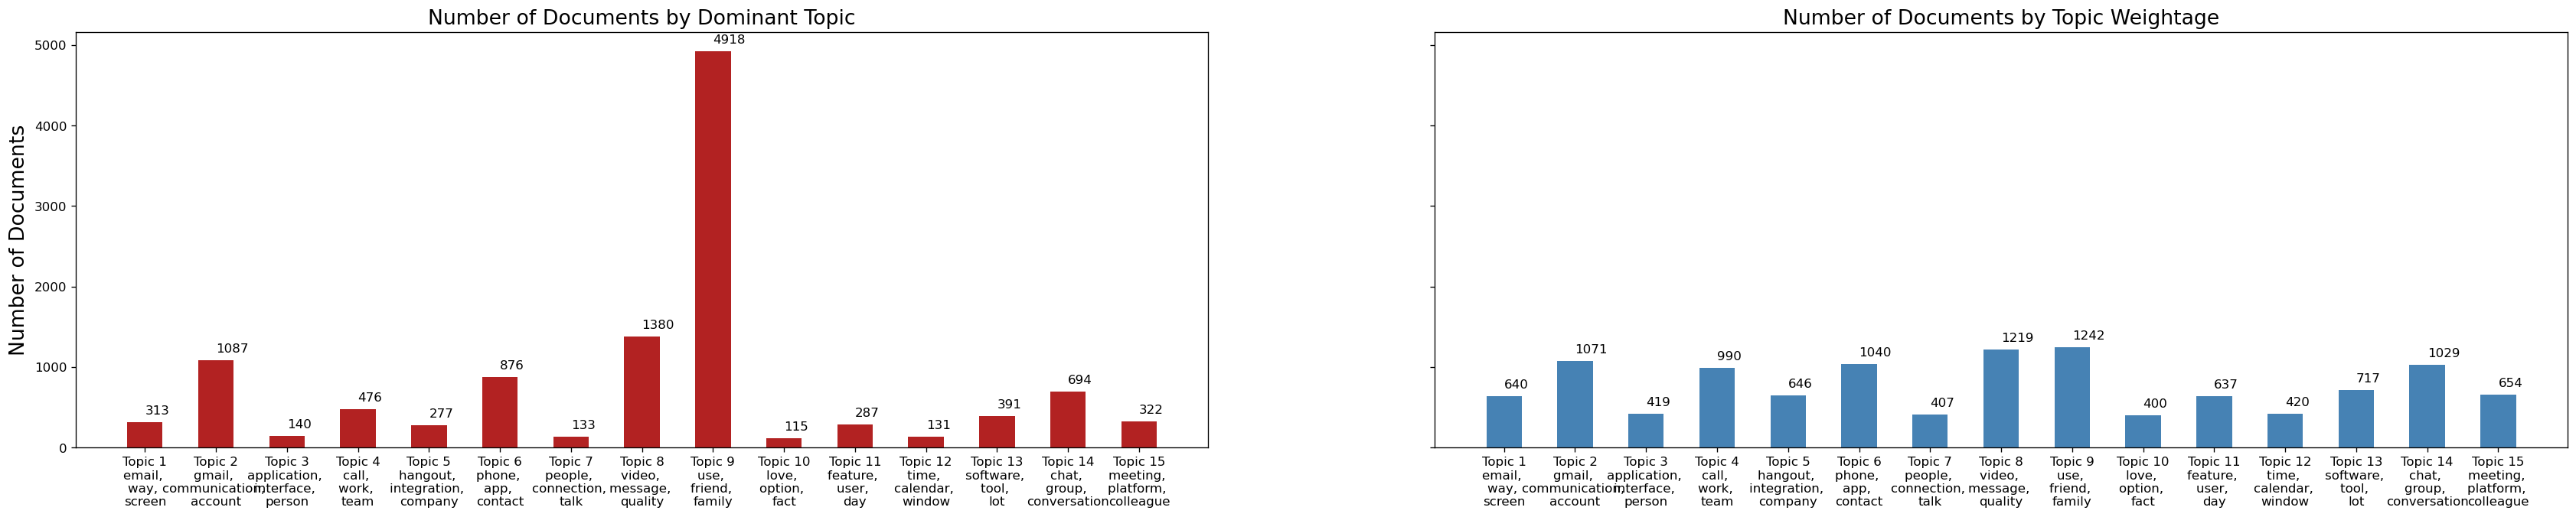

In [17]:
import numpy as np
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors
from matplotlib.ticker import FuncFormatter

# Plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(35, 6), dpi=120, sharey=True)

# Topic Distribution by Dominant Topics
ax1.bar(x='Dominant_Topic', height='count', data=df_dominant_topic_in_each_doc, width=.5, color='firebrick')
for index,data in enumerate(df_dominant_topic_in_each_doc['count']):
    ax1.text(x=index , y =data+100 , s=int(data) , fontdict=dict(fontsize=10))
ax1.set_xticks(range(df_dominant_topic_in_each_doc.Dominant_Topic.unique().__len__()))
tick_formatter = FuncFormatter(lambda x, _: 'Topic ' + str(x+1)+ '\n' + df_top3words.loc[df_top3words.topic_id==x, 'words'].values[0])
ax1.xaxis.set_major_formatter(tick_formatter)
ax1.set_title('Number of Documents by Dominant Topic', fontdict=dict(size=16))
ax1.set_ylabel('Number of Documents', fontdict=dict(size=16))

# Topic Distribution by Topic Weights
ax2.bar(x='index', height='count', data=df_topic_weightage_by_doc, width=.5, color='steelblue')
for index,data in enumerate(df_topic_weightage_by_doc['count']):
    ax2.text(x=index , y =data+100 , s=int(data) , fontdict=dict(fontsize=10))
ax2.set_xticks(range(df_topic_weightage_by_doc.index.unique().__len__()))
ax2.xaxis.set_major_formatter(tick_formatter)
ax2.set_title('Number of Documents by Topic Weightage', fontdict=dict(size=16))

plt.savefig('Documents_google_pros.png')
plt.show()

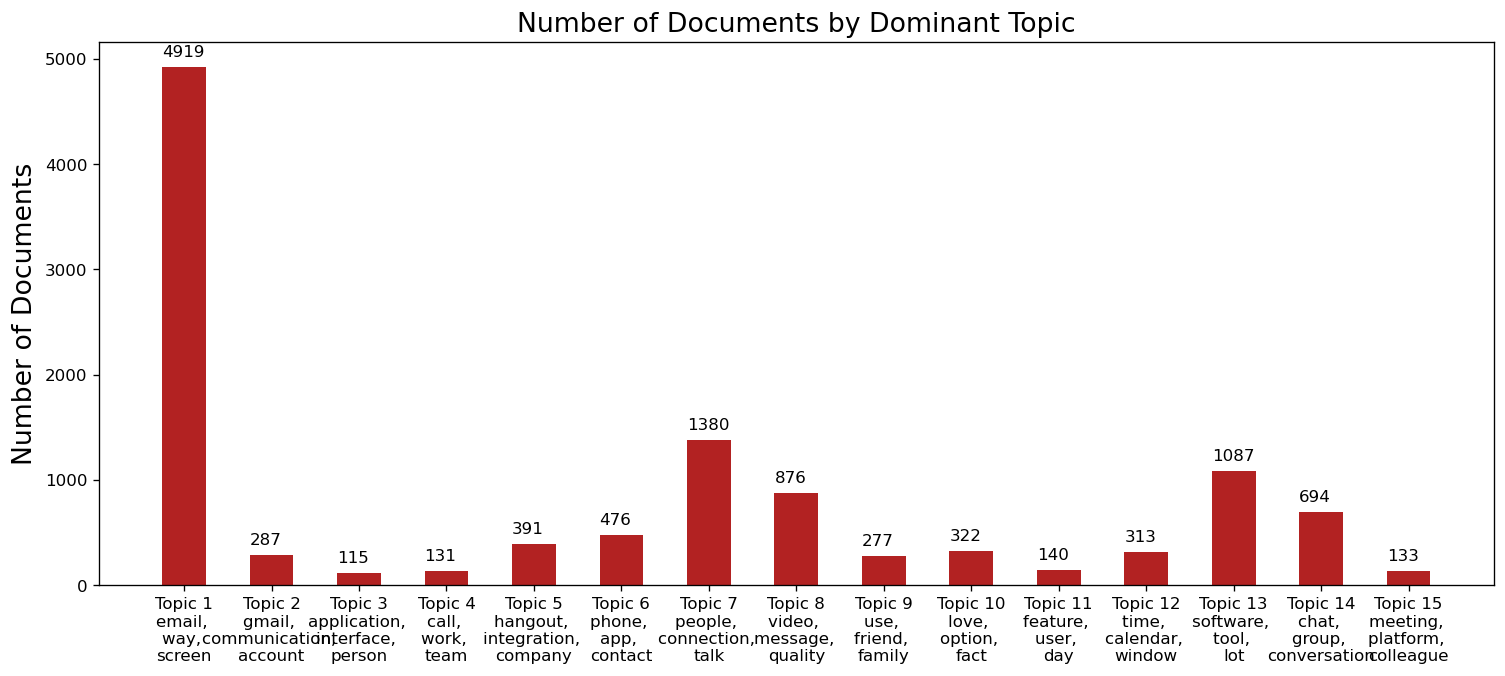

In [37]:
import numpy as np
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors
from matplotlib.ticker import FuncFormatter
topic_counts = df_topic_sents_keywords['Dominant_Topic'].value_counts()


# Number of Documents for Each Topic
topic_counts = df_topic_sents_keywords['Dominant_Topic'].value_counts()

# Percentage of Documents for Each Topic
topic_contribution = round(topic_counts/topic_counts.sum(), 4)
# topic_contribution = topic_contribution.rename_axis('Dominant_Topic').reset_index(name='percentage')

# Topic Number and Keywords
topic_num_keywords = df_topic_sents_keywords[['Dominant_Topic', 'Topic_Keywords']].drop_duplicates()
topic_num_keywords.index = range(len(topic_num_keywords))

# Concatenate Column wise
df_dominant_topics = pd.concat([topic_num_keywords, topic_contribution, topic_counts], axis=1)
df_dominant_topics.columns = ['Dominant_Topic', 'Topic_Keywords', 'Perc_eviews', 'Num_Reviews']
df_dominant_topics = df_dominant_topics.sort_values(by=['Dominant_Topic'])


# Plot
fig, ax1 = plt.subplots(1, 1, figsize=(15, 6), dpi=120, sharey=True)
# Topic Distribution by Dominant Topics
ax1.bar(x='Dominant_Topic', height='Num_Reviews', data=df_dominant_topics, width=.5, color='firebrick')
for index,data in enumerate(df_dominant_topics['Num_Reviews']):
    ax1.text(x=index-0.25 , y =data+100 , s=int(data) , fontdict=dict(fontsize=10))
ax1.set_xticks(range(df_dominant_topic_in_each_doc.Dominant_Topic.unique().__len__()))
tick_formatter = FuncFormatter(lambda x, _: 'Topic ' + str(x+1)+ '\n' + df_top3words.loc[df_top3words.topic_id==x, 'words'].values[0])
ax1.xaxis.set_major_formatter(tick_formatter)
ax1.set_title('Number of Documents by Dominant Topic', fontdict=dict(size=16))
ax1.set_ylabel('Number of Documents', fontdict=dict(size=16))

plt.savefig('Documents_google_pros.png')
plt.show()

### LDA 法二

In [129]:
from gensim.models import LdaMulticore
# Build LDA model
import matplotlib.pyplot as plt
topics_num = []
Coherence_Score = []

for i in range(1,21):
    lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                            id2word=id2word,
                                            num_topics=i, 
                                            random_state=100,
                                            chunksize=100,
                                            passes=10,
                                            per_word_topics=True)
    coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
    coherence_lda = coherence_model_lda.get_coherence()
    topics_num.append(i)
    Coherence_Score.append(coherence_lda)

C:\Users\lindy\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


C:\Users\lindy\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


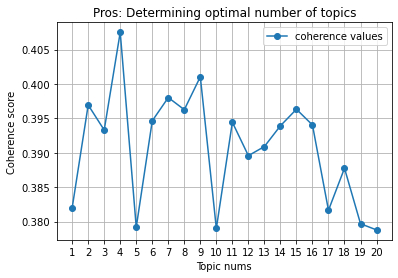

In [34]:
lines = plt.plot(topics_num, Coherence_Score)
plt.setp(lines, marker = "o") 
plt.grid(True)
plt.title("Pros: Determining optimal number of topics") 
plt.xlabel("Topic nums")
plt.ylabel("Coherence score")
plt.legend(["coherence values"], loc='best')
plt.xticks(topics_num)
plt.show()

In [93]:
# supporting function
def compute_coherence_values(corpus, dictionary, k, a, b):
    
    lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                           id2word=dictionary,
                                           num_topics=k, 
                                           random_state=100,
                                           chunksize=100,
                                           passes=10,
                                           alpha=a,
                                           eta=b)
    
    coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
    
    return coherence_model_lda.get_coherence()

C:\Users\lindy\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [95]:
import numpy as np
import tqdm
grid = {}
grid['Validation_Set'] = {}
# Topics range
min_topics = 2
max_topics = 11
step_size = 1
topics_range = range(min_topics, max_topics, step_size)
# Alpha parameter
alpha = list(np.arange(0.01, 1, 0.3))
alpha.append('symmetric')
alpha.append('asymmetric')
# Beta parameter
beta = list(np.arange(0.01, 1, 0.3))
beta.append('symmetric')
# Validation sets
num_of_docs = len(corpus)
corpus_sets = [# gensim.utils.ClippedCorpus(corpus, num_of_docs*0.25), 
               # gensim.utils.ClippedCorpus(corpus, num_of_docs*0.5), 
               gensim.utils.ClippedCorpus(corpus, int(num_of_docs*0.75)), 
               corpus]
corpus_title = ['75% Corpus', '100% Corpus']
model_results = {'Validation_Set': [],
                 'Topics': [],
                 'Alpha': [],
                 'Beta': [],
                 'Coherence': []
                }
# Can take a long time to run
if 1 == 1:
    pbar = tqdm.tqdm(total=540)
    
    # iterate through validation corpuses
    for i in range(len(corpus_sets)):
        # iterate through number of topics
        for k in topics_range:
            # iterate through alpha values
            for a in alpha:
                # iterare through beta values
                for b in beta:
                    # get the coherence score for the given parameters
                    cv = compute_coherence_values(corpus=corpus_sets[i], dictionary=id2word, 
                                                  k=k, a=a, b=b)
                    # Save the model results
                    model_results['Validation_Set'].append(corpus_title[i])
                    model_results['Topics'].append(k)
                    model_results['Alpha'].append(a)
                    model_results['Beta'].append(b)
                    model_results['Coherence'].append(cv)
                    
                    pbar.update(1)
    pd.DataFrame(model_results).to_csv('lda_tuning_results.csv', index=False)
    pbar.close()

C:\Users\lindy\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)

  0%|                                                                                          | 0/540 [30:25<?, ?it/s]

 24%|██████████████████▍                                                           | 128/540 [30:52<1:40:52, 14.69s/it]


 48%|████████████████████████████████████▌                                       | 260/540 [1:01:52<1:05:27, 14.03s/it]


 73%|████████████████████████████████████████████████████████▌                     | 392/540 [1:33:48<35:07, 14.24s/it]


 97%|███████████████████████████████████████████████████████████████████████████▋  | 524/540 [2:06:20<03:59, 14.98s/it]


100%|██████████████████████████████████████████████████████████████████████████████| 540/540 [2:10:13<00:00, 14.47s/it]


In [35]:
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=9, 
                                           random_state=100,
                                           chunksize=100,
                                           passes=10,
                                           alpha=0.91,
                                           eta=0.91)

C:\Users\lindy\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [36]:
from pprint import pprint
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.004*"zoom" + 0.004*"host" + 0.003*"easy" + 0.003*"meeting" + '
  '0.003*"group" + 0.003*"feature" + 0.003*"use" + 0.002*"reaction" + '
  '0.002*"allow" + 0.002*"chat"'),
 (1,
  '0.004*"zoom" + 0.003*"easy" + 0.002*"meeting" + 0.001*"video" + 0.001*"use" '
  '+ 0.001*"feature" + 0.001*"work" + 0.001*"software" + 0.001*"user" + '
  '0.001*"great"'),
 (2,
  '0.008*"student" + 0.006*"zoom" + 0.006*"teacher" + 0.004*"class" + '
  '0.004*"software" + 0.003*"face" + 0.003*"teach" + 0.003*"learn" + '
  '0.002*"use" + 0.002*"school"'),
 (3,
  '0.036*"zoom" + 0.034*"meeting" + 0.020*"easy" + 0.017*"feature" + '
  '0.016*"video" + 0.013*"screen" + 0.012*"share" + 0.011*"also" + '
  '0.011*"software" + 0.011*"use"'),
 (4,
  '0.003*"zoom" + 0.003*"easy" + 0.002*"meeting" + 0.001*"video" + '
  '0.001*"feature" + 0.001*"software" + 0.001*"work" + 0.001*"great" + '
  '0.001*"use" + 0.001*"screen"'),
 (5,
  '0.004*"meeting" + 0.003*"zoom" + 0.003*"easy" + 0.002*"keep" + '
  '0.002*"opportunit

C:\Users\lindy\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [37]:
from gensim.models import CoherenceModel
# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)

C:\Users\lindy\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



Coherence Score:  0.36378294852872695


In [114]:
# !pip install pyLDAvis
import pyLDAvis
import pyLDAvis.gensim_models
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)
vis

C:\Users\lindy\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3     -0.183433  0.000548       1        1  71.340992
8     -0.008453 -0.013816       2        1   5.298651
2      0.013261  0.016711       3        1   4.206442
0      0.011204  0.002529       4        1   3.436912
5      0.031109 -0.001798       5        1   3.398365
6      0.018849  0.002244       6        1   3.342570
7      0.041380 -0.002129       7        1   3.055659
1      0.035391 -0.001912       8        1   2.963721
4      0.040692 -0.002378       9        1   2.956688, topic_info=         Term        Freq       Total Category  logprob  loglift
43       zoom  905.000000  905.000000  Default  30.0000  30.0000
421   student   63.000000   63.000000  Default  29.0000  29.0000
125      host  101.000000  101.000000  Default  28.0000  28.0000
5        easy  509.000000  509.000000  Default  27.0000  27.0000
33   software  277.000000  277.000000  Default  26.0000  26.0000
..        ...         ...         ...      ...      ...      ...
99       time    0.705888  181.507761   Topic9  -7.2359  -2.0285
57        get    0.659232  104.938645   Topic9  -7.3043  -1.5490
411      need    0.674715  137.151131   Topic9  -7.2811  -1.7934
186      even    0.660484  147.856703   Topic9  -7.3024  -1.8899
2        chat    0.659307  176.704901   Topic9  -7.3042  -2.0699

[597 rows x 6 columns], token_table=      Topic      Freq  Term
term                       
233       1  0.945155  able
233       2  0.008833  able
233       3  0.008833  able
233       4  0.008833  able
233       5  0.008833  able
...     ...       ...   ...
43        5  0.004415  zoom
43        6  0.007727  zoom
43        7  0.003311  zoom
43        8  0.004415  zoom
43        9  0.003311  zoom

[1249 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 9, 3, 1, 6, 7, 8, 2, 5])